In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
%matplotlib inline

In [2]:
# Загруим всё подряд
pokemon = pd.read_csv('pokemon.csv', index_col='id', dtype={'evolution_parent_pokemon_id':np.float64})
abilities = pd.read_csv('abilities.csv', index_col='id')
egg_groups = pd.read_csv('egg_groups.csv', index_col='id')

In [3]:
#pokemon.dtypes

In [4]:
#constants
N = 10

In [5]:
# Что там внутри?
pokemon.head()

,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,kdex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
id,,,,,,,,,,,,,,,,,,,,,
1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,1.0,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,2.0,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,3.0,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,4.0,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,5.0,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [6]:
# Колонок много, посмотрим все
pokemon.columns

Index(['identifier', 'name', 'name_phonetic', 'species', 'name_jp',
       'name_jp_romaji', 'species_jp', 'generation_id', 'ndex', 'kdex', 'jdex',
       'jdex_old', 'hdex', 'sdex', 'udex', 'type1_id', 'type2_id',
       'ability1_id', 'ability2_id', 'abilitydream_id',
       'evolution_parent_pokemon_id', 'evolution_method_id',
       'evolution_parameter', 'height', 'weight', 'gender_rate', 'catch_rate',
       'exp_yield', 'base_happiness', 'egg_group1_id', 'egg_group2_id',
       'is_baby', 'baby_breed_item_id', 'hatch_counter', 'lvl_100_exp',
       'pokemon_order', 'legacy_id'],
      dtype='object')

In [7]:
# Я не силён в японском)
pokemon.drop(['name_jp', 'name_jp_romaji', 'species_jp'], axis=1);

In [8]:
pokemon.describe()

,generation_id,ndex,kdex,jdex,jdex_old,hdex,sdex,udex,type1_id,type2_id,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
count,663.000000,663.000000,151.000000,256.000000,251.000000,205.000000,218.000000,158.000000,663.000000,306.000000,...,663.000000,663.000000,663.000000,175.000000,663.000000,9.000000,663.000000,6.630000e+02,663.000000,505.000000
mean,3.045249,328.033183,76.000000,128.500000,126.000000,102.970732,106.500000,77.879747,8.761689,7.372549,...,141.375566,66.033183,6.452489,7.908571,0.027149,280.111111,27.669683,1.053326e+06,333.441931,253.019802
std,1.480305,186.922901,43.734045,74.045031,72.601653,59.272874,60.730063,45.319581,4.785481,4.828036,...,59.858184,19.112375,4.329735,3.586803,0.162641,27.624466,24.401434,1.686685e+05,193.035763,145.957973
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,...,20.000000,0.000000,1.000000,2.000000,0.000000,231.000000,5.000000,6.000000e+05,1.000000,1.000000
25%,2.000000,166.500000,38.500000,64.750000,63.500000,52.000000,53.250000,39.250000,5.000000,3.000000,...,83.000000,70.000000,3.000000,5.000000,0.000000,291.000000,20.000000,1.000000e+06,166.500000,127.000000
50%,3.000000,332.000000,76.000000,128.500000,126.000000,103.000000,107.500000,77.500000,10.000000,5.000000,...,145.000000,70.000000,5.000000,7.000000,0.000000,293.000000,20.000000,1.000000e+06,332.000000,253.000000
75%,4.000000,487.000000,113.500000,192.250000,188.500000,154.000000,156.750000,116.750000,12.000000,12.000000,...,187.500000,70.000000,10.000000,10.000000,0.000000,295.000000,25.000000,1.059860e+06,500.500000,379.000000
max,5.000000,649.000000,151.000000,256.000000,251.000000,202.000000,210.000000,155.000000,17.000000,17.000000,...,390.000000,140.000000,15.000000,14.000000,1.000000,297.000000,120.000000,1.640000e+06,667.000000,505.000000


In [9]:
abilities.head(N)

,identifier,name,name_jp,name_jp_tm,generation_id,color_id
id,,,,,,
1,stench,Stench,あくしゅう,Stench,3,4
2,drizzle,Drizzle,あめふらし,Rainfall,3,11
3,speed-boost,Speed Boost,かそく,Acceleration,3,23
4,battle-armor,Battle Armor,カブトアーマー,Kabuto Armor,3,6
5,sturdy,Sturdy,がんじょう,Sturdy,3,6
6,damp,Damp,しめりけ,Moisture,3,11
7,limber,Limber,じゅうなん,Flexible,3,13
8,sand-veil,Sand Veil,すながくれ,Hidden in Sand,3,5
9,static,Static,せいでんき,Static Electricity,3,13


In [10]:
egg_groups

,identifier,name,name_jp,list_order,legacy_id
id,,,,,
1,monster,Monster,かいじゅう,2,9
2,water-1,Water 1,すいちゅう１,8,11
3,bug,Bug,むし,3,1
4,flying,Flying,ひこう,4,4
5,ground,Ground,りくじょう,5,5
6,fairy,Fairy,ようせい,6,3
7,plant,Plant,しょくぶつ,7,10
8,humanshape,Humanshape,ひとがた,11,6
9,water-3,Water 3,すいちゅう３,10,13


Большая часть информации лежит в файле pokemon. Глянем похожесть столбцов.  
Оставим только уникальные колонки, удалив полностью коррелирущие.

In [11]:
def getUniqueNumberColumns(df):
    corrTable = df.corr()
    columns = list()
    for col in corrTable:
        unique = True
        for col2 in columns:
            if abs(corrTable[col][col2]) == 1:
                unique = False
                break
        if unique:
            columns.append(col)
    return columns
def getUniqueColumns(df):
    numberColumns = getUniqueNumberColumns(df)
    unique = list()
    for col in df.columns:
        if col in numberColumns or df.dtypes[col] == np.object:
            unique.append(col)
    return unique

In [12]:
pokemon = pokemon[getUniqueColumns(pokemon)]

In [13]:
# сгруппируем покемонов по типам, возьмём средние параметры. А детей посчитаем, потомучто их мало. Потомучто можем
agregates = pokemon.groupby('species').agg({'height':'mean', 
                                            'weight':'mean', 
                                            'catch_rate':'mean', 
                                            'base_happiness':'mean', 
                                            'is_baby':'sum'})
agregates.head()

,height,is_baby,weight,catch_rate,base_happiness
species,,,,,
Abundance,15.0,0,680.0,3.0,90.0
Acorn,5.0,0,40.0,255.0,70.0
Alpha,32.0,0,3200.0,3.0,0.0
Angler,5.0,0,120.0,190.0,70.0
Ant Pit,7.0,0,150.0,255.0,70.0


Проверим гипотезу, что чем выше покемон, тем он счастливее

                  height  base_happiness
height          1.000000       -0.306326
base_happiness -0.306326        1.000000


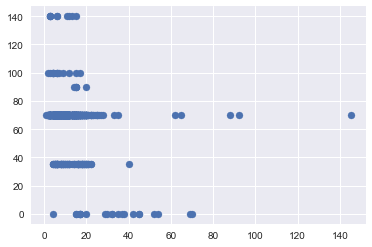

In [14]:
print(pokemon[['height', 'base_happiness']].corr())
plt.scatter(pokemon['height'], pokemon['base_happiness'])
plt.show()

Гипотеза __не подтверждается__, более того корреляция отрицательная. Но абсолютное значение небольшое, поэтому вывод о существаовании зависимости на основании этих данных не получиается.

Проверим, что у покемонов веса и рост распределены равномерно. Для этого воспользуемся критерием Колмогорова-Смирнова

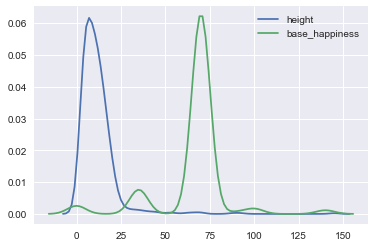

In [15]:
# Для наглядности построим графики плотности распределений
seaborn.kdeplot(pokemon.height)
seaborn.kdeplot(pokemon.base_happiness)
seaborn.plt.show()

In [16]:
def normalize(a):
    return (a-a.mean())/a.std()

In [17]:
print(stats.kstest(normalize(pokemon['height']), 'norm'))
print(stats.kstest(normalize(pokemon['base_happiness']), 'norm'))

KstestResult(statistic=0.19526336903809755, pvalue=0.0)
KstestResult(statistic=0.44948071017048996, pvalue=0.0)


Предположнение __не подтверждается__, потомучто статистики слишком большие. На графике видны всплески вне основного "колокола" у каждого распределения

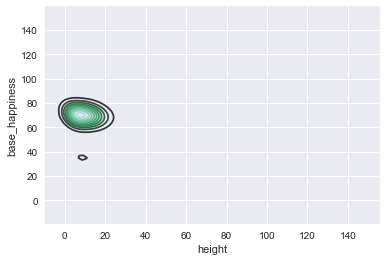

In [18]:
seaborn.kdeplot(pokemon.height, pokemon.base_happiness)
seaborn.plt.show()

А что если чем больше опыта покемон нам даёт, тем реже он встречается. Вроде логично. Проверим?

In [19]:
print(pokemon[['catch_rate', 'exp_yield']].corr())

            catch_rate  exp_yield
catch_rate    1.000000  -0.687956
exp_yield    -0.687956   1.000000


Так и есть

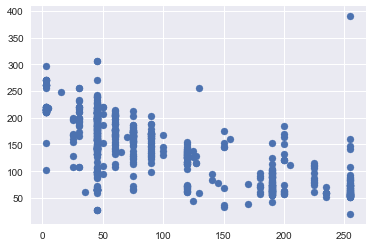

In [20]:
plt.scatter(pokemon['catch_rate'],pokemon['exp_yield'])

А по весу?

In [21]:
print(pokemon[['weight', 'exp_yield']].corr())

             weight  exp_yield
weight     1.000000   0.466718
exp_yield  0.466718   1.000000


Посмотрим, что нам даст группировка по максимальному опыту

In [22]:
from collections import Counter
Counter(pokemon.lvl_100_exp)

Counter({600000: 22,
         800000: 52,
         1000000: 258,
         1059860: 177,
         1250000: 140,
         1640000: 14})

In [23]:
agregates = pokemon.groupby('lvl_100_exp').aggregate({'height':['mean', 'max', 'std'], 
                                            'weight':['mean', 'max'], 
                                            'catch_rate':['mean', 'max'], 
                                            'base_happiness':['mean', 'max'], 
                                            'is_baby':'sum'})
agregates

height                 is_baby       weight        catch_rate  \
                  mean  max        std     sum         mean   max        mean   
lvl_100_exp                                                                     
600000       12.227273   62  11.987818       0   412.000000  1620  103.409091   
800000        8.576923   22   4.069717       6   266.634615  1680  116.923077   
1000000       9.972868   92   8.796181       8   418.321705  4000  115.294574   
1059860       9.564972   33   5.078644       2   376.751412  3100   98.898305   
1250000      16.685714   70  12.377797       2  1240.764286  9500   57.021429   
1640000      21.500000  145  36.299502       0   809.214286  3980  142.500000   

                 base_happiness       
             max           mean  max  
lvl_100_exp                           
600000       255      70.000000   70  
800000       255      73.942308  140  
1000000      255      69.418605  140  
1059860      255      69.067797  100  
1250000      255      52.000000  140  
1640000      255      70.000000   70

Посмотрим, как проходили evolve'ы

In [24]:
N = pokemon.count()[0]
pokemon.visit = [False] * N
pokemon.evolve_cnt = [1] * N

# чтобы не кастовать каждый раз по одному в индекс
pokemon.evolution_parent_pokemon_id.fillna(0, inplace=True)
pokemon.evolution_parent_pokemon_id = pokemon.evolution_parent_pokemon_id.astype(np.int32, copy=False)

def dfs(p):
    if pokemon.visit[p]:
        return pokemon.evolve_cnt[p]
    pokemon.visit[p] = True
    parent = pokemon.evolution_parent_pokemon_id[p]
    if parent:
        pokemon.evolve_cnt[p] = 1 + dfs(parent)
        return pokemon.evolve_cnt[p]
    else:
        return 1

In [25]:
count_dead_ids = 0
for i in range(1, N):
    try:
        dfs(i)
    except(KeyError): #Оказалось, что в таблице есть битые сслыки на id
        count_dead_ids += 1
print("Битых айдишников:", count_dead_ids)

Битых айдишников: 13


Посчитаем сколько покеомнов какого уровня по evolve?

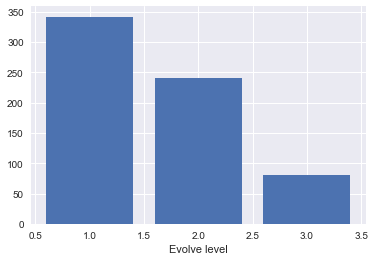

In [26]:
c = list(dict(Counter(pokemon.evolve_cnt)).items()) # Немного извратно получилось, но работает
x, h = zip(*c)
plt.bar(x, h)
plt.xlabel('Evolve level')
plt.show()